# Assignment Python 1

### Import Library yang diperlukan

In [82]:
import numpy as np
import pandas as pd

In [83]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional for ggplot-like style

### Import Dataset

Pada Assignment Python 1 ini akan digunakan Dataset dari Kaggle yaitu the London Crime. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008 - Dec 2016.

In [3]:
df = pd.read_csv("london_crime_by_lsoa.csv")

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


### Area Plot

In [84]:
df_london = pd.read_csv("london_crime_by_lsoa.csv")
df_london

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [108]:
df1 = df_london[['borough', 'value']]

In [109]:
df2 = df1.groupby('borough')['value'].sum()
df2.head()

borough
Barking and Dagenham    149447
Barnet                  212191
Bexley                  114136
Brent                   227551
Bromley                 184349
Name: value, dtype: int64

In [110]:
df_top = df2.sort_values(ascending=False)
df_top5 = df_top.head(5)
df_top5

borough
Westminster    455028
Lambeth        292178
Southwark      278809
Camden         275147
Newham         262024
Name: value, dtype: int64

In [111]:
df_westminster = df_london[
    (df_london['borough']== 'Westminster')
].groupby(['year'])['value'].sum()

df_westminster = df_westminster.to_frame()

In [112]:
df_westminster = df_westminster.rename(
    columns={
        'value': 'Westminster',
    }
)

df_westminster

,Westminster
year,
2008,47846
2009,48456
2010,48116
2011,54243
2012,59226
2013,53852
2014,47564
2015,47395
2016,48330


In [113]:
df_lambeth = df_london[
    (df_london['borough']== 'Lambeth')
].groupby(['year'])['value'].sum()

df_lambeth = df_lambeth.to_frame()

In [114]:
df_lambeth = df_lambeth.rename(
    columns={
        'value': 'Lambeth',
    }
)

df_lambeth

,Lambeth
year,
2008,31717
2009,31225
2010,31671
2011,33224
2012,33473
2013,31868
2014,31765
2015,33164
2016,34071


In [115]:
df_southwark = df_london[
    (df_london['borough']== 'Southwark')
].groupby(['year'])['value'].sum()

df_southwark = df_southwark.to_frame()

In [116]:
df_southwark = df_southwark.rename(
    columns={
        'value': 'Southwark',
    }
)

df_southwark

,Southwark
year,
2008,33470
2009,30623
2010,31320
2011,30723
2012,30737
2013,31128
2014,28912
2015,30260
2016,31636


In [117]:
df_camden = df_london[
    (df_london['borough']== 'Camden ')
].groupby(['year'])['value'].sum()

df_camden = df_camden.to_frame()

In [118]:
df_camden = df_camden.rename(
    columns={
        'value': 'Camden ',
    }
)

df_camden

,Camden
year,


In [119]:
df_newham = df_london[
    (df_london['borough']== 'Newham')
].groupby(['year'])['value'].sum()

df_newham = df_newham.to_frame()

In [120]:
df_newham = df_newham.rename(
    columns={
        'value': 'Newham ',
    }
)

df_newham

,Newham
year,
2008,29752
2009,28610
2010,30728
2011,27978
2012,30067
2013,27577
2014,28005
2015,29217
2016,30090


In [121]:
df_areatop5 = pd.concat([df_westminster, df_lambeth, df_southwark, df_camden, df_newham], axis=1, sort=False)
df_areatop5

,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,NaN,29752
2009,48456,31225,30623,NaN,28610
2010,48116,31671,31320,NaN,30728
2011,54243,33224,30723,NaN,27978
2012,59226,33473,30737,NaN,30067
2013,53852,31868,31128,NaN,27577
2014,47564,31765,28912,NaN,28005
2015,47395,33164,30260,NaN,29217
2016,48330,34071,31636,NaN,30090


In [122]:
#Kolom tahun sebagai tabel
label_area = df_london['year'].unique()

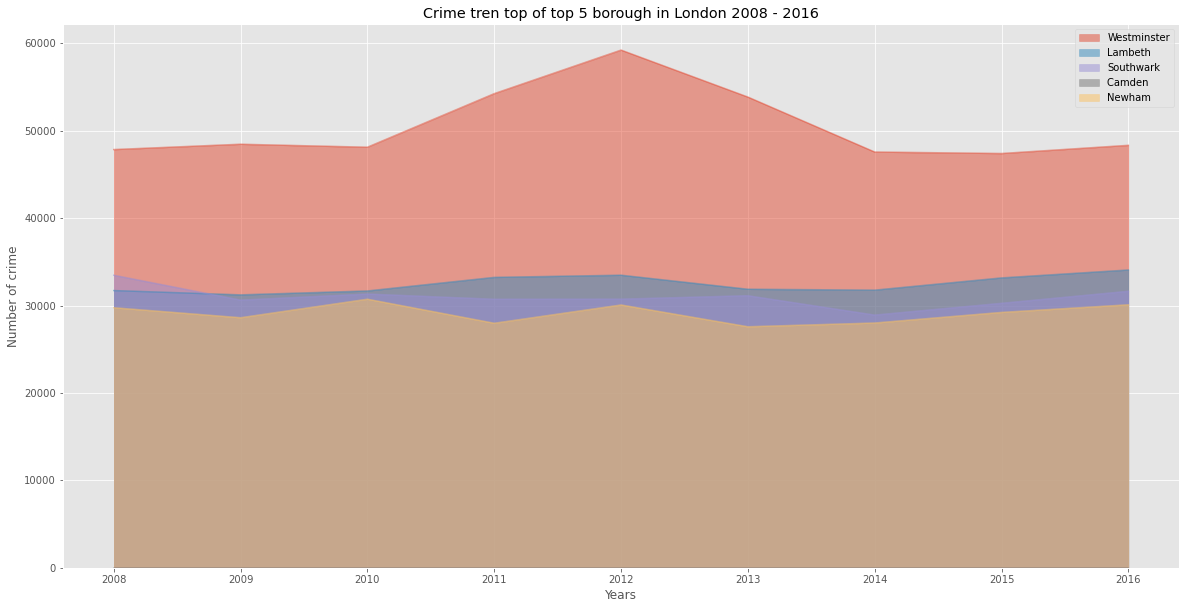

In [124]:
df_areatop5.index = df_areatop5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_areatop5.plot(kind='area', 
             label = label_area,
             stacked=False,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Crime tren top of top 5 borough in London 2008 - 2016')
plt.ylabel('Number of crime')
plt.xlabel('Years')

plt.show()

crime tren top 5 borough in London ada pada
1. Westminster tahun 2012
2. Lambeth tahun 2016
3. Southwark tahun 2008
4. Camden NaN
5. Newham tahun 2010

## Preprocessing Dataset


In [5]:
# print the dimension of dataset
df.shape 

(13490604, 7)

In [6]:
# melihat tipe objek masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
df.columns.values

array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [8]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

In [9]:
# cek missing value pada dataset
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [10]:
df.isna().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

Karena semua jumlahnya 0 maka tidak terdapat missing values pada dataset

In [11]:
# melihat number of unique dari setiap kolom
df.nunique()

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

In [12]:
# cek duplikasi data
dups = df.duplicated()
print(dups.any())

False


Setelah cek duplikasi data hasilnya menyatakan "false" sehingga tidak terdapat duplikasi pada dataset

In [13]:
df2=df[['borough','value']]
df2.head(3)

,borough,value
0,Croydon,0
1,Greenwich,0
2,Bromley,0


## Line Chart

In [14]:
Year=df['year'].unique()
sums_year=df.groupby('year').sum()
sums=sums_year['value'].to_numpy()
n = len(Year)

In [15]:
for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Sum of crimes happened in each year:")
pos1 = np.arange(len(Year))
print(sums)

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Sum of crimes happened in each year:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]


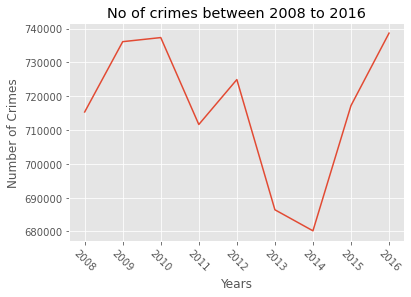

In [16]:
pos1 = np.arange(len(Year))

plt.plot(sums)
plt.xticks(pos1,Year)
plt.title("No of crimes between 2008 to 2016")
plt.xlabel('Years')
plt.ylabel("Number of Crimes")
plt.xticks(rotation=-45 )

plt.show()

## Pie Chart

In [17]:
lables=df['major_category'].unique()
lables

array(['Burglary', 'Violence Against the Person', 'Robbery',
       'Theft and Handling', 'Criminal Damage', 'Drugs',
       'Fraud or Forgery', 'Other Notifiable Offences', 'Sexual Offences'],
      dtype=object)

In [18]:
sizes=df.groupby(['major_category']).size()
sizes

major_category
Burglary                       1043604
Criminal Damage                2069172
Drugs                          1179468
Fraud or Forgery                236520
Other Notifiable Offences       776304
Robbery                         939384
Sexual Offences                 108108
Theft and Handling             3966300
Violence Against the Person    3171744
dtype: int64

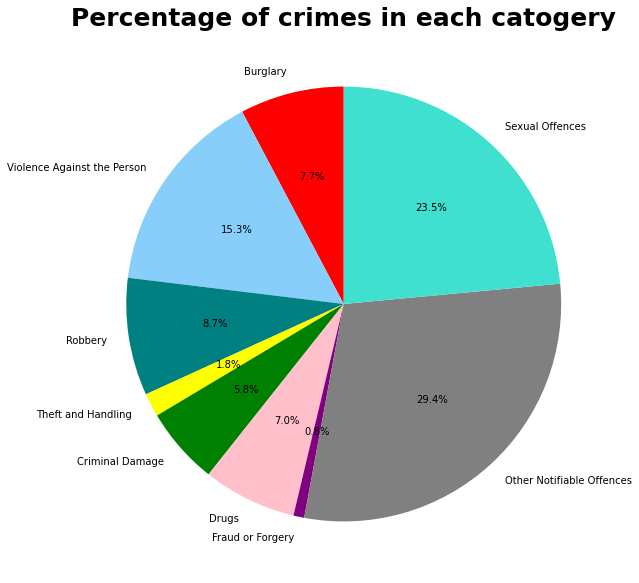

In [19]:
plt.figure(figsize=(20,10))
colors=['red','lightskyblue','teal','yellow', 'green','pink','purple','grey','turquoise']
font1 = {'weight': 'bold',
        'size': 25,
        }

ax = plt.axes()
plt.title('Percentage of crimes in each catogery', fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%')
plt.show()

urutan presentase of crimes di beberapa kategori dari yang terbanyak
1. Other Notifiable Offences 29.4%
2. Sexual Offences 23.5%
3. Violence Against the Person
4. Robbery 8.7%
5. Buglary 7.7%
6. Drugs 7.0%
7. Criminal Damage 5.8%
8. Theft and Handling 1.8%
9. Fraud or FOrgery 0.8%

## Bar Chart

In [20]:
label=df['major_category'].unique()
print("The type of crimes that are taking place ")
print(label)

The type of crimes that are taking place 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']


In [21]:
pos = np.arange(len(label))

In [22]:
totals=df.groupby('major_category').sum()
Totals=totals['value'].to_numpy()
print("Total number of crime that took place in each category: ")
print(Totals)

Total number of crime that took place in each category: 
[ 754293  630938  470765    5325  106349  258873    1273 2661861 1558081]


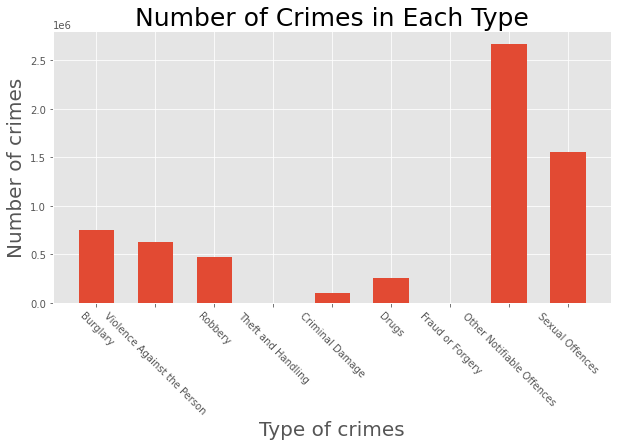

In [23]:
plt.figure(figsize=(10,5))
plt.bar(pos,Totals,width=0.6)
plt.xticks(pos, label)
plt.xlabel('Type of crimes', fontsize=20)
plt.xticks(rotation=-45)
plt.ylabel('Number of crimes', fontsize=20)
plt.title('Number of Crimes in Each Type', fontsize=25)

plt.show()

## Scatter Plot

In [24]:
year2016=df.loc[df['year'] == 2016]

In [25]:
months=year2016['month'].unique()
months.sort()

In [26]:
sum_month=year2016.groupby(['month']).sum()

In [27]:
Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


In [28]:
n1 = np.arange(len(months))
xrange=range(1,13)

(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

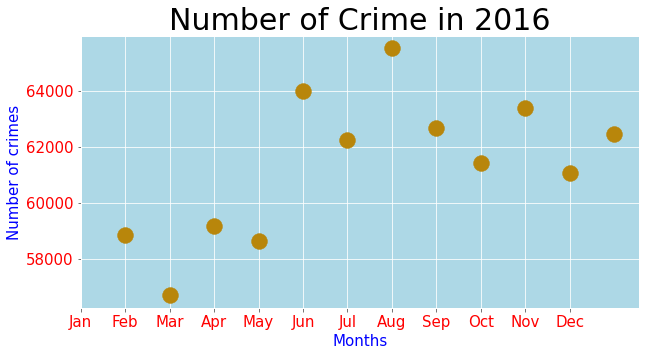

In [29]:
plt.figure(figsize=(10,5))

ax = plt.axes()
ax.set_facecolor("lightblue")

plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("Number of Crime in 2016", fontsize=30)
plt.xlabel('Months',fontsize=15,color='blue')
plt.ylabel('Number of crimes',fontsize=15,color='blue')

plt.xticks(n1,name_of_months)
plt.xticks(color='red',fontsize=15)
plt.yticks(color='red',fontsize=15)

## Word Cloud

In [41]:
from wordcloud import WordCloud, STOPWORDS

In [42]:
df.minor_category = df['minor_category']
df.minor_category.head()

0    Burglary in Other Buildings
1                 Other violence
2                 Other violence
3    Burglary in Other Buildings
4              Personal Property
Name: minor_category, dtype: object

In [43]:
word_string = " ".join(str(i) for i in df.minor_category)

word_cloud = WordCloud(max_words=90, background_color='white').generate(word_string)
print(word_cloud)

In [44]:
df.minor_category.unique()

array(['Burglary in Other Buildings', 'Other violence',
       'Personal Property', 'Other Theft', 'Offensive Weapon',
       'Criminal Damage To Other Building', 'Theft/Taking of Pedal Cycle',
       'Motor Vehicle Interference & Tampering',
       'Theft/Taking Of Motor Vehicle', 'Wounding/GBH',
       'Other Theft Person', 'Common Assault', 'Theft From Shops',
       'Possession Of Drugs', 'Harassment', 'Handling Stolen Goods',
       'Criminal Damage To Dwelling', 'Burglary in a Dwelling',
       'Criminal Damage To Motor Vehicle', 'Other Criminal Damage',
       'Counted per Victim', 'Going Equipped', 'Other Fraud & Forgery',
       'Assault with Injury', 'Drug Trafficking', 'Other Drugs',
       'Business Property', 'Other Notifiable', 'Other Sexual',
       'Theft From Motor Vehicle', 'Rape', 'Murder'], dtype=object)

In [45]:
df.minor_category.nunique()

32

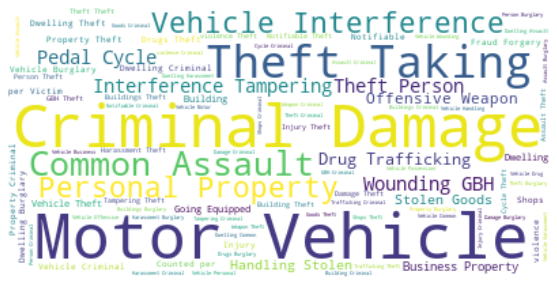

In [46]:
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Maps

In [61]:
import folium
import geojson as gj
import json
from folium.features import Choropleth

In [62]:
!wget --quiet https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [38]:
world_map = folium.Map()
world_map

In [39]:
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

# create a plain world map
london_map = folium.Map(location=[54.237933,-2.36967], zoom_start=5)

# generate choropleth map using the total crime in London from 2008 to 2016
london_map.choropleth(
    geo_data=world_geo,
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', #Yellow, Orange, Red
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of London'
)

#display map
london_map

C:\Users\aminf\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Histogram

In [40]:
df = pd.read_csv("london_crime_by_lsoa.csv")

In [41]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [47]:
year_value = df[(df["year"] == 2015)].groupby(["major_category"])["value"].sum()

In [48]:
year_value

major_category
Burglary                        70489
Criminal Damage                 62976
Drugs                           39785
Fraud or Forgery                    0
Other Notifiable Offences       14229
Robbery                         21383
Sexual Offences                     0
Theft and Handling             284022
Violence Against the Person    218740
Name: value, dtype: int64

In [49]:
count, bin_edges = np.histogram(year_value)
print(count)
print(bin_edges)

[4 1 2 0 0 0 0 1 0 1]
[     0.   28402.2  56804.4  85206.6 113608.8 142011.  170413.2 198815.4
 227217.6 255619.8 284022. ]


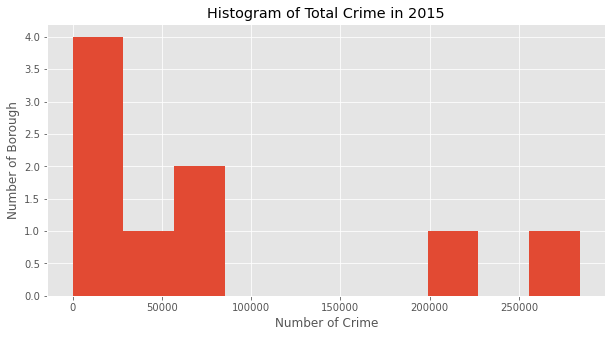

In [50]:
year_value.plot(kind='hist', figsize=(10,5))

plt.title('Histogram of Total Crime in 2015') # add a title to the histogram
plt.ylabel('Number of Borough') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

## Box Plot

In [57]:
df_2008 = df[
    (df["year"] == 2008) 
].groupby(["month"])["value"].sum()

df_2008 = df_2008.to_frame()

In [58]:
df_2008 = df_2008.rename(
    columns={
        "value": "2008", 
    }
)

df_2008.head()

,2008
month,
1,65419
2,62626
3,61343
4,59640
5,62587


In [59]:
df_2015 = df[
    (df["year"] == 2015) 
].groupby(["month"])["value"].sum()

df_2015 = df_2015.to_frame()

In [60]:
df_2015 = df_2015.rename(
    columns={
        "value": "2015", 
    }
)

df_2015.head()

,2015
month,
1,57055
2,53316
3,60096
4,56445
5,61038


In [62]:
df_join = pd.concat([df_2008, df_2015], axis=1, sort=False)
df_join

,2008,2015
month,,
1,65419,57055
2,62626,53316
3,61343,60096
4,59640,56445
5,62587,61038
6,62290,60760
7,64126,61606
8,59959,58056
9,58414,57564


In [63]:
df_join.describe()

,2008,2015
count,12.000000,12.000000
mean,61553.416667,59302.000000
std,2339.785400,2805.226875
min,57488.000000,53316.000000
25%,59879.250000,57436.750000
50%,61842.500000,60428.000000
75%,62808.000000,61180.000000
max,65419.000000,62487.000000


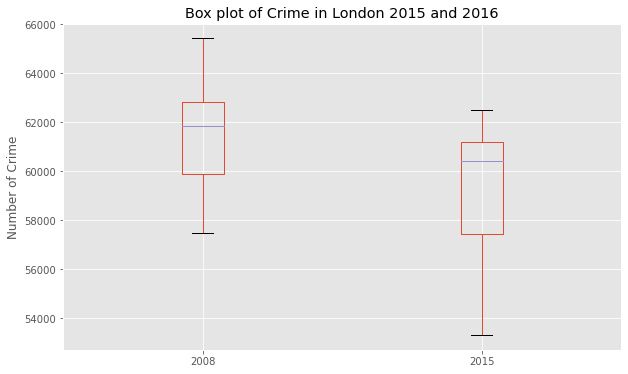

In [64]:
df_join.plot(kind='box', figsize=(10, 6))

plt.title('Box plot of Crime in London 2015 and 2016')
plt.ylabel('Number of Crime')

plt.show()